In [1]:
from numpy import asarray, exp
from numpy.random import randn, rand, seed
from matplotlib import pyplot

In [2]:
# Define objective function
# y=x**2
def objective(step):
    return step[0] ** 2.0

In [3]:
seed(1)
# search space
area = asarray([[-6.0, 6.0]])
area

array([[-6.,  6.]])

In [4]:
area[:, 1]

array([6.])

In [5]:
 len( area )

1

In [6]:
rand( len( area ))

array([0.417022])

In [7]:
ans=area[:, 0] + rand( len( area ) )
ans

array([-5.27967551])

In [8]:
area[:, 1]

array([6.])

In [9]:
 area[:, 1] - area[:, 0]

array([12.])

In [10]:
seed(1) # By using seed(1) same random numbers will get generated each time the code cell is run,
area = asarray([[-6.0, 6.0]]) # exploration search space scope

start_point = area[:, 0] + rand( len( area ) ) * ( area[:, 1] - area[:, 0] )
print(start_point)
print('start_point=', start_point)
# negative values are resolved with getting the squaring
start_point_eval = objective(start_point)
print('objective function evaluation of start point=',round(start_point_eval,2))

[-0.99573594]
start_point= [-0.99573594]
objective function evaluation of start point= 0.99


In [11]:
# all afore-discussed steps have been implemented here as one function.
# step size is the rate of change.
#Providing a very large value is not good, as it leads to drastic changes causing to loost global optimizations
def sa(objective, area = ([[-6.0,6.0]]), n_iterations = 1200, step_size = 0.1, temperature = 12):
    # Generating a random start point for the search hunt
    start_point = area[:, 0] + rand( len( area ) ) * ( area[:, 1] - area[:, 0] )
    # Evaluating the start_point
    start_point_eval = objective(start_point)

In [12]:
# Storing the start point and its objective function evaluation into mia_start_point and mia_start_eval.
mia_start_point, mia_start_eval = start_point, start_point_eval

# this empty list will get updated over time once looping starts.
outputs = []

# Above is set-wise elaboration of the Simulated annealing algorithm statements.

# Below is the combined logic integrated into the Simulated annealing as one algorithm

In [13]:
# Define simulated annealing algorithm as a one single consolidated function
def sa(objective, area, iterations, step_size, temperature):
    # create initial point for the commencement to  the student Mia.
    start_point = area[:, 0] + rand( len( area ) ) * ( area[:, 1] - area[:, 0] )
    # evaluate initial point
    start_point_eval = objective(start_point)

    # Assign previous and new solution to previous and new_point_eval variable
    mia_start_point, mia_start_eval = start_point, start_point_eval
    outputs = []
    for i in range(iterations):
        # First step by mia
        mia_step = mia_start_point + randn( len( area ) ) * step_size
        mia_step_eval = objective(mia_step)
        # this suits for a minimization problem. Re-assign the variables with the minimum values generated
        if mia_step_eval < start_point_eval:
            start_point, start_point_eval = mia_step, mia_step_eval
      #Append the new values into the output list
            outputs.append(start_point_eval)
            print('Metropolis Criteria = %.5f' % metropolis," ",'iteration Number = ',i," ", 'best_so_far = ',start_point," "
                  ,'new_best = %.5f' % start_point_eval)

        # derive the delta of current_step and starting_step
        difference = mia_step_eval - mia_start_eval
        t = temperature / float(i + 1)
        # calculate Metropolis Acceptance Criterion / Acceptance Probability
        metropolis = exp(-difference / t)
        # check whether the new point is acceptable -Metropolis is greater than the random, accept the new point, else
        # continue with the same old point.
        if difference < 0 or rand() < metropolis:
            mia_start_point, mia_start_eval = mia_step, mia_step_eval
    return [start_point, start_point_eval, outputs]


Metropolis Criteria = 0.76232   iteration Number =  37   best_so_far =  [-0.95340594]   new_best = 0.90898
Metropolis Criteria = 0.87733   iteration Number =  39   best_so_far =  [-0.91563305]   new_best = 0.83838
Metropolis Criteria = 1.44710   iteration Number =  40   best_so_far =  [-0.85680363]   new_best = 0.73411
Metropolis Criteria = 1.42798   iteration Number =  41   best_so_far =  [-0.8221177]   new_best = 0.67588
Metropolis Criteria = 1.22608   iteration Number =  42   best_so_far =  [-0.68541443]   new_best = 0.46979
Metropolis Criteria = 2.09273   iteration Number =  43   best_so_far =  [-0.61804282]   new_best = 0.38198
Metropolis Criteria = 1.16478   iteration Number =  50   best_so_far =  [-0.42564785]   new_best = 0.18118
Metropolis Criteria = 0.81414   iteration Number =  66   best_so_far =  [-0.35632231]   new_best = 0.12697
Metropolis Criteria = 1.74595   iteration Number =  67   best_so_far =  [-0.33780667]   new_best = 0.11411
Metropolis Criteria = 1.02155   iterat

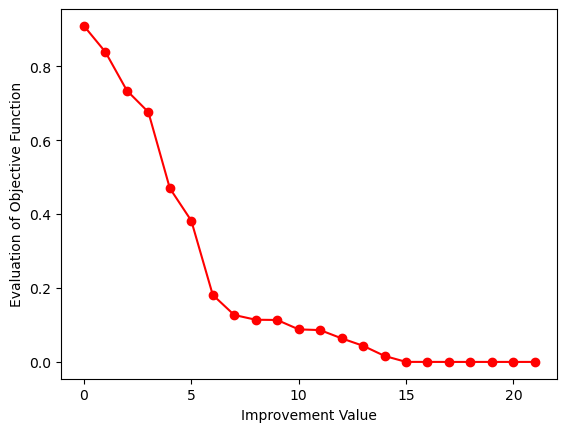

In [16]:
seed(1)
# define the area of the search space
area = asarray([[-6.0, 6.0]])
# initial temperature
temperature = 12
# define the total no. of iterations
iterations = 1200
# define maximum step_size
step_size = 0.1
# perform the simulated annealing search - Passing the params for the method call
start_point, output, outputs = sa(objective, area, iterations, step_size, temperature)
#plotting the values. -ro option is to depict the points clearly.
pyplot.plot(outputs, 'ro-')
pyplot.xlabel('Improvement Value')
pyplot.ylabel('Evaluation of Objective Function')
pyplot.show()

So this output shows us, in which iteration the improvement happened, the previous best point, and the new best point. The graph shows that there are about 22 improvements ( red circle ) as the algorithm reaches the global optima. There are certain places where there are no big improvements but as the algorithm reaches the end there are many improvements.